In [1]:
import numpy as np
from astropy.io import fits
from skimage import transform
from skimage import restoration
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import cv2



In [2]:
blurry = "/Users/sarayu/Downloads/m31bH20 (1).fits"
sharp = "/Users/sarayu/Downloads/m31bH (4).fits"

In [3]:
# Understanding the files

hdul = fits.open("/Users/sarayu/Downloads/m31bH20 (1).fits")
hdul.info()
hdul_1 = fits.open("/Users/sarayu/Downloads/m31bH (4).fits")
hdul_1.info()

Filename: /Users/sarayu/Downloads/m31bH20 (1).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (2351, 2351)   float32   
Filename: /Users/sarayu/Downloads/m31bH (4).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4848, 4848)   float32   


In [4]:
# Read FITS images
blurry_image = fits.getdata(blurry)
sharp_image = fits.getdata(sharp)

# Detailed diagnostics
print("SHARP IMAGE DIAGNOSTICS:")
print("Type:", type(sharp_image))
print("Is ndarray?:", isinstance(sharp_image, np.ndarray))
print("Shape:", sharp_image.shape)
print("Dtype:", sharp_image.dtype)
print("Flags:\n", sharp_image.flags)

# Force conversion to a clean numpy array
sharp_clean = np.array(sharp_image, dtype=np.float32, copy=True)
print("\nAFTER CLEANING:")
print("Type:", type(sharp_clean))
print("Is ndarray?:", isinstance(sharp_clean, np.ndarray))
print("Shape:", sharp_clean.shape)
print("Dtype:", sharp_clean.dtype)

# Try to resize the cleaned version
try:
    sharp_resized = cv2.resize(sharp_clean, (100, 100))
    print("\n✓ Resize successful!")
except Exception as e:
    print("\n✗ Resize failed:", e)

SHARP IMAGE DIAGNOSTICS:
Type: <class 'numpy.ndarray'>
Is ndarray?: True
Shape: (4848, 4848)
Dtype: >f4
Flags:
   C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False


AFTER CLEANING:
Type: <class 'numpy.ndarray'>
Is ndarray?: True
Shape: (4848, 4848)
Dtype: float32

✓ Resize successful!


In [5]:
# Read FITS images
blurry_image = fits.getdata(blurry)
sharp_image = fits.getdata(sharp)

# Convert to float32
blurry_image = blurry_image.astype(np.float32)
sharp_image = sharp_image.astype(np.float32)

# Normalize the data to 0-1 range
blurry_image = (blurry_image - blurry_image.min()) / (blurry_image.max() - blurry_image.min())
sharp_image = (sharp_image - sharp_image.min()) / (sharp_image.max() - sharp_image.min())

# Resize sharp image using skimage
sharp_resized = transform.resize(
    sharp_image,
    (blurry_image.shape[0], blurry_image.shape[1]),
    anti_aliasing=True
)

print("Resize successful!")
print("Sharp resized shape:", sharp_resized.shape)

# Apply unsupervised Wiener deconvolution
result = restoration.unsupervised_wiener(blurry_image, sharp_resized)

# Check what was returned
print("\nResult type:", type(result))
print("Result:", result)

# Extract the deconvolved image and PSF
if isinstance(result, tuple):
    deconvolved, psf = result
    print("\nDeconvolved shape:", deconvolved.shape)
    print("PSF type:", type(psf))
    print("PSF:", psf)
else:
    deconvolved = result
    psf = None


Resize successful!
Sharp resized shape: (2351, 2351)

Result type: <class 'tuple'>
Result: (array([[ 2.9775727e-05, -4.5056612e-04, -3.9734613e-04, ...,
        -7.2927360e-05, -9.3687304e-05,  1.5887948e-05],
       [ 9.0933027e-04,  5.2939175e-04, -3.6431284e-04, ...,
        -4.4677040e-04, -5.7372102e-04,  2.8751243e-04],
       [ 7.4092980e-04,  1.9073763e-04, -6.5716082e-04, ...,
        -2.4868603e-04, -2.9722287e-04,  8.2316925e-04],
       ...,
       [-7.8027789e-04, -3.1998759e-04, -7.7518972e-04, ...,
        -3.2614500e-04, -4.2170266e-04, -8.3413662e-04],
       [-1.3295481e-04, -3.1994187e-04, -6.9106853e-04, ...,
         4.1523013e-05,  8.7197041e-05, -4.2548910e-04],
       [-1.7065702e-04, -3.1218305e-04, -6.8734016e-04, ...,
         8.5525957e-05, -6.1199484e-05,  2.9686812e-04]], dtype=float32), {'noise': [1, 2.1284759531473543, 4.353263623549838, 8.768908073038535, 17.581799236474797, 35.24197461390033, 70.43984903531583, 140.45901510476736, 279.5486790018237, 55

In [6]:
psf_dict = result[1]
ratio = np.array(psf_dict['noise']) / np.array(psf_dict['prior'])
mean_ratio = np.mean(ratio)
print("Average noise/prior ratio:", mean_ratio)

Average noise/prior ratio: 0.6390776844606779


Original blurry range: 0.0 to 1492.7937
Original sharp range: 0.0 to 1492.7937

After normalization:
Blurry range: 0.0 to 1.0
Sharp range: 0.0 to 1.0

Deconvolved range: -0.0032428468 to 0.988735


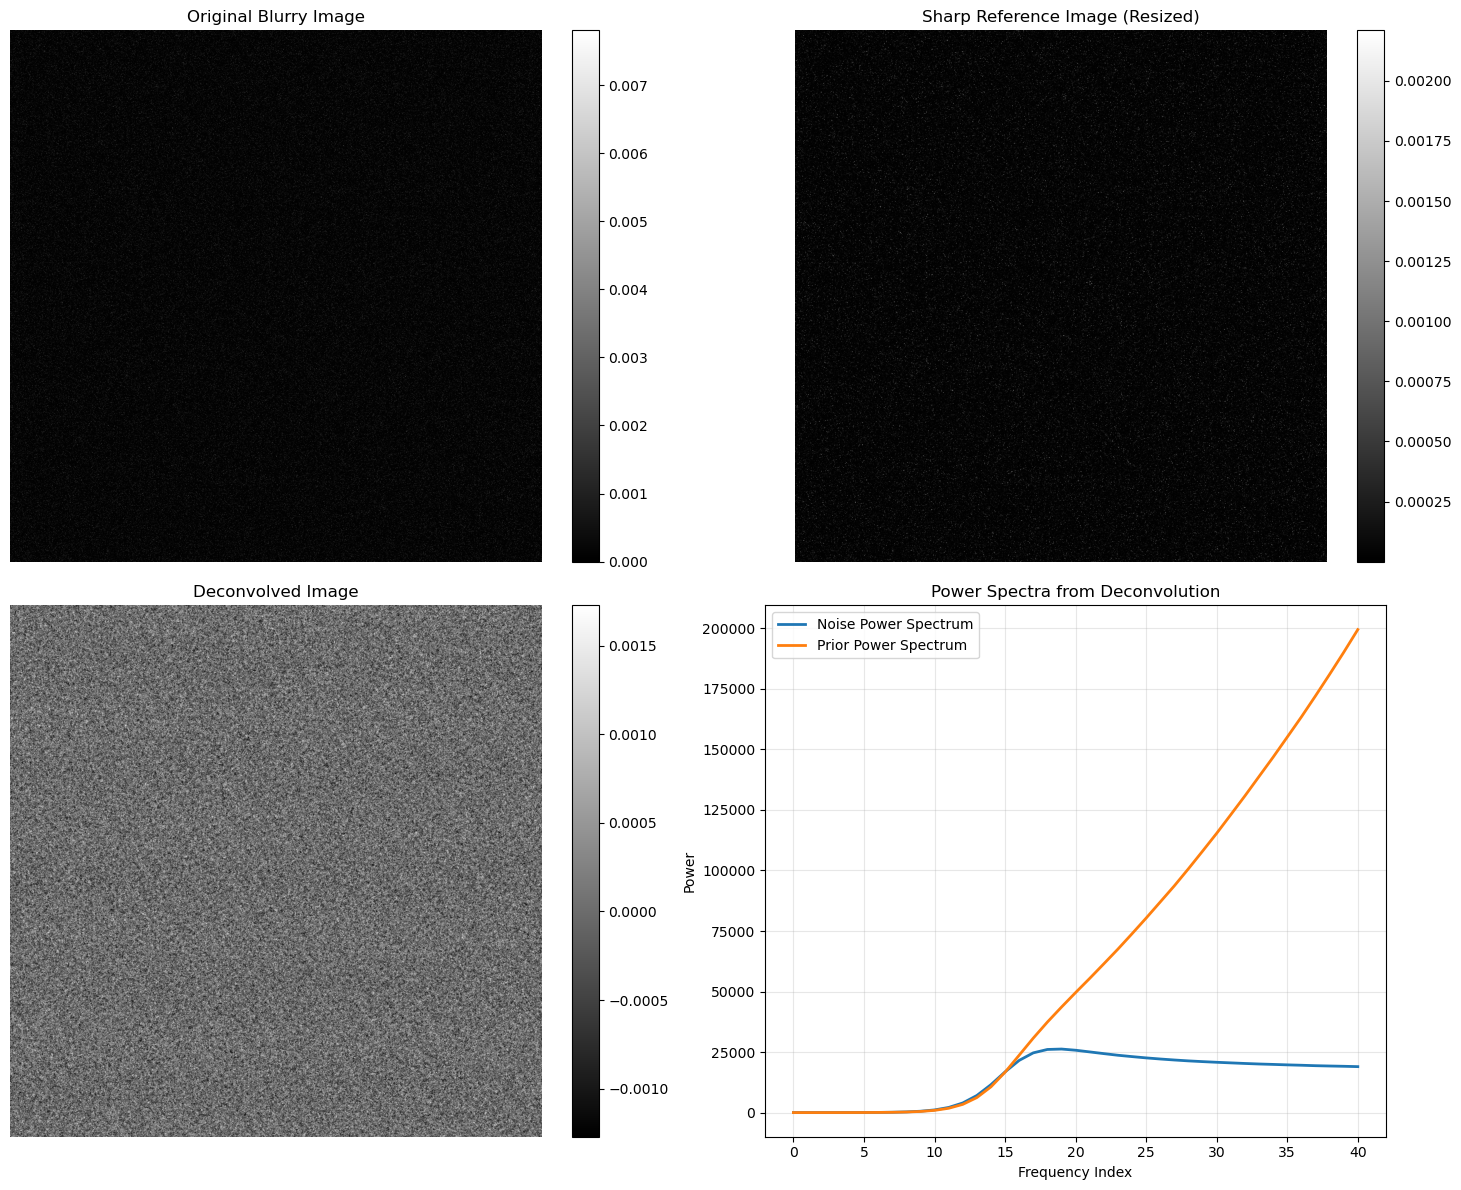

In [7]:
# Read FITS images
blurry_image = fits.getdata(blurry)
sharp_image = fits.getdata(sharp)

# Check the original data ranges
print("Original blurry range:", blurry_image.min(), "to", blurry_image.max())
print("Original sharp range:", sharp_image.min(), "to", sharp_image.max())

# Convert to float32
blurry_image = blurry_image.astype(np.float32)
sharp_image = sharp_image.astype(np.float32)

# Normalize the data to 0-1 range
blurry_image = (blurry_image - blurry_image.min()) / (blurry_image.max() - blurry_image.min())
sharp_image = (sharp_image - sharp_image.min()) / (sharp_image.max() - sharp_image.min())

print("\nAfter normalization:")
print("Blurry range:", blurry_image.min(), "to", blurry_image.max())
print("Sharp range:", sharp_image.min(), "to", sharp_image.max())

# Resize sharp image using skimage
sharp_resized = transform.resize(
    sharp_image,
    (blurry_image.shape[0], blurry_image.shape[1]),
    anti_aliasing=True
)

# Apply unsupervised Wiener deconvolution
deconvolved, psf_info = restoration.unsupervised_wiener(blurry_image, sharp_resized)

print("\nDeconvolved range:", deconvolved.min(), "to", deconvolved.max())

# Create visualization with better scaling
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Use percentile-based scaling for better visualization
def scale_image(img, percentile=99.5):
    vmin = np.percentile(img, 100 - percentile)
    vmax = np.percentile(img, percentile)
    return vmin, vmax

# Original blurry image
vmin, vmax = scale_image(blurry_image)
im1 = axes[0, 0].imshow(blurry_image, cmap='gray', vmin=vmin, vmax=vmax)
axes[0, 0].set_title("Original Blurry Image")
axes[0, 0].axis('off')
plt.colorbar(im1, ax=axes[0, 0], fraction=0.046)

# Sharp reference image (resized)
vmin, vmax = scale_image(sharp_resized)
im2 = axes[0, 1].imshow(sharp_resized, cmap='gray', vmin=vmin, vmax=vmax)
axes[0, 1].set_title("Sharp Reference Image (Resized)")
axes[0, 1].axis('off')
plt.colorbar(im2, ax=axes[0, 1], fraction=0.046)

# Deconvolved image
vmin, vmax = scale_image(deconvolved)
im3 = axes[1, 0].imshow(deconvolved, cmap='gray', vmin=vmin, vmax=vmax)
axes[1, 0].set_title("Deconvolved Image")
axes[1, 0].axis('off')
plt.colorbar(im3, ax=axes[1, 0], fraction=0.046)

# Plot the noise and prior power spectra
axes[1, 1].plot(psf_info['noise'], label='Noise Power Spectrum', linewidth=2)
axes[1, 1].plot(psf_info['prior'], label='Prior Power Spectrum', linewidth=2)
axes[1, 1].set_xlabel('Frequency Index')
axes[1, 1].set_ylabel('Power')
axes[1, 1].set_title('Power Spectra from Deconvolution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
print("PSF diagnostics:")
print("Type:", type(psf))
print("Is ndarray?:", isinstance(psf, np.ndarray))
if isinstance(psf, np.ndarray):
    print("Shape:", psf.shape)
    print("Dtype:", psf.dtype)
else:
    print("Not a NumPy array.")


PSF diagnostics:
Type: <class 'dict'>
Is ndarray?: False
Not a NumPy array.


PSF shape: (41, 41)


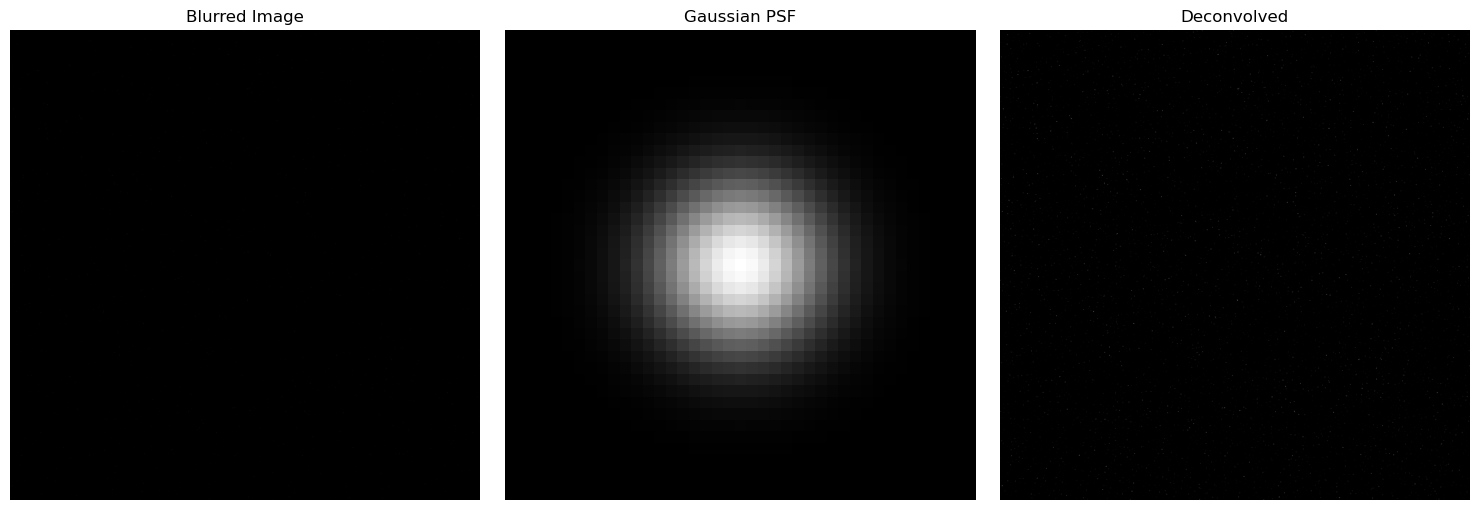

In [17]:
# Create a 2D Gaussian PSF
def gaussian_psf_2d(size, sigma):
    """Create a 2D Gaussian PSF"""
    x = np.arange(0, size, 1, float)
    y = x[:, np.newaxis]
    x0 = y0 = size // 2
    psf = np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))
    return psf / psf.sum()  # Normalize

# Parameters
psf_size = 41  # Must be odd number
sigma = 5.0    # Adjust based on your blur

# Create 2D PSF
psf = gaussian_psf_2d(psf_size, sigma)

# Now psf has shape (41, 41) instead of (41,)
print(f"PSF shape: {psf.shape}")

# Apply Lucy-Richardson deconvolution
deconvolved = restoration.richardson_lucy(blurry_image, psf, num_iter=30)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original/Blurred
axes[0].imshow(blurry_image, cmap='gray')
axes[0].set_title("Blurred Image")
axes[0].axis('off')

# PSF (now 2D!)
axes[1].imshow(psf, cmap='gray')
axes[1].set_title("Gaussian PSF")
axes[1].axis('off')

# Deconvolved
axes[2].imshow(deconvolved, cmap='gray')
axes[2].set_title("Deconvolved")
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [24]:
import numpy as np
from skimage import metrics

def simple_metrics(original, blurred, deconvolved):
    """
    Simple performance metrics for deconvolution
    
    Returns:
    - PSNR: Higher is better (>30 is good)
    - SSIM: Higher is better (closer to 1 is better)
    """
    
    # Check and print shapes for debugging
    print(f"Original shape: {original.shape}")
    print(f"Blurred shape: {blurred.shape}")
    print(f"Deconvolved shape: {deconvolved.shape}")
    print()
    
    # Make sure all images have the same shape
    # Find the minimum dimensions
    min_h = min(original.shape[0], blurred.shape[0], deconvolved.shape[0])
    min_w = min(original.shape[1], blurred.shape[1], deconvolved.shape[1])
    
    # Crop all images to the same size
    original_crop = original[:min_h, :min_w]
    blurred_crop = blurred[:min_h, :min_w]
    deconvolved_crop = deconvolved[:min_h, :min_w]
    
    # Calculate data range
    data_range = original_crop.max() - original_crop.min()
    
    # PSNR - Peak Signal to Noise Ratio
    psnr_blurred = metrics.peak_signal_noise_ratio(original_crop, blurred_crop, data_range=data_range)
    psnr_deconv = metrics.peak_signal_noise_ratio(original_crop, deconvolved_crop, data_range=data_range)
    
    # SSIM - Structural Similarity Index
    ssim_blurred = metrics.structural_similarity(original_crop, blurred_crop, data_range=data_range)
    ssim_deconv = metrics.structural_similarity(original_crop, deconvolved_crop, data_range=data_range)
    
    print("Performance Metrics:")
    print("-" * 40)
    print(f"PSNR (Blurred):      {psnr_blurred:.2f} dB")
    print(f"PSNR (Deconvolved):  {psnr_deconv:.2f} dB")
    print(f"Improvement:         {psnr_deconv - psnr_blurred:+.2f} dB")
    print()
    print(f"SSIM (Blurred):      {ssim_blurred:.4f}")
    print(f"SSIM (Deconvolved):  {ssim_deconv:.4f}")
    print(f"Improvement:         {ssim_deconv - ssim_blurred:+.4f}")
    print("-" * 40)
    
    return {
        'psnr_blurred': psnr_blurred,
        'psnr_deconvolved': psnr_deconv,
        'ssim_blurred': ssim_blurred,
        'ssim_deconvolved': ssim_deconv
    }

# Usage:
results = simple_metrics(sharp_image, blurry_image, deconvolved)


Original shape: (4848, 4848)
Blurred shape: (2351, 2351)
Deconvolved shape: (2351, 2351)

Performance Metrics:
----------------------------------------
PSNR (Blurred):      40.53 dB
PSNR (Deconvolved):  46.15 dB
Improvement:         +5.62 dB

SSIM (Blurred):      0.9685
SSIM (Deconvolved):  0.9805
Improvement:         +0.0120
----------------------------------------
